# Jupyter notebook for debugging

In [13]:
%load_ext autoreload
%autoreload 2

# Copied from `train` function in train_simple.py:L78
import yaml

device = 'cpu'
hyp = 'data/hyps/hyp.scratch-low.yaml'

with open(hyp, errors="ignore") as f:
    hyp = yaml.safe_load(f)  # load hyps dict

In [18]:
from models.yolo import Model
from utils.general import check_dataset

cfg = 'models/yolov5n_nuscenes.yaml'
data = 'data/nuscenes.yaml'
data_dict = check_dataset(data)

nc = int(data_dict["nc"])  # number of classes
model = Model(cfg, ch=3, nc=nc, anchors=hyp.get("anchors")).to(device)  # create

print(model.model[-1].anchors)  # hyperparameters

Overriding model.yaml nc=4 with nc=15

                 from  n    params  module                                  arguments                     
  0                -1  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]              
  1                -1  1      4672  models.common.Conv                      [16, 32, 3, 2]                
  2                -1  1      4800  models.common.C3                        [32, 32, 1]                   
  3                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  4                -1  2     29184  models.common.C3                        [64, 64, 2]                   
  5                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  6                -1  3    156928  models.common.C3                        [128, 128, 3]                 
  7                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]             

tensor([[[ 1.25000,  1.62500],
         [ 2.00000,  3.75000],
         [ 4.12500,  2.87500]],

        [[ 1.87500,  3.81250],
         [ 3.87500,  2.81250],
         [ 3.68750,  7.43750]],

        [[ 3.62500,  2.81250],
         [ 4.87500,  6.18750],
         [11.65625, 10.18750]]])


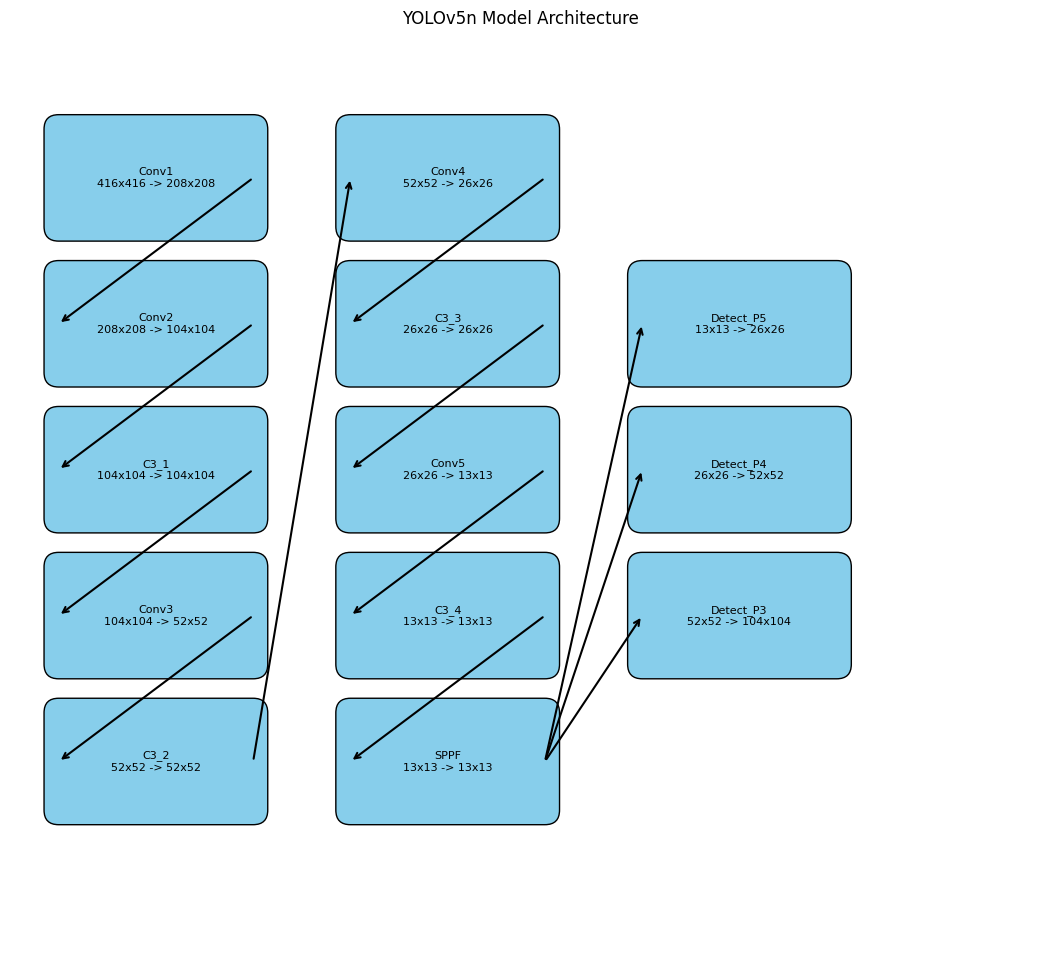

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_yolov5n_architecture():
    fig, ax = plt.subplots(figsize=(20, 12))

    # 노드 추가: (레이어 이름, (위치 x, 위치 y), (너비, 높이), (입력 크기, 출력 크기))
    layers = [
        ('Conv1', (0, 12), (4, 2), (416, 208)),
        ('Conv2', (0, 9), (4, 2), (208, 104)),
        ('C3_1', (0, 6), (4, 2), (104, 104)),
        ('Conv3', (0, 3), (4, 2), (104, 52)),
        ('C3_2', (0, 0), (4, 2), (52, 52)),
        ('Conv4', (6, 12), (4, 2), (52, 26)),
        ('C3_3', (6, 9), (4, 2), (26, 26)),
        ('Conv5', (6, 6), (4, 2), (26, 13)),
        ('C3_4', (6, 3), (4, 2), (13, 13)),
        ('SPPF', (6, 0), (4, 2), (13, 13)),
        ('Detect_P5', (12, 9), (4, 2), (13, 26)),
        ('Detect_P4', (12, 6), (4, 2), (26, 52)),
        ('Detect_P3', (12, 3), (4, 2), (52, 104))
    ]

    # 각 레이어를 그림
    for layer_name, pos, size, shapes in layers:
        rect = patches.FancyBboxPatch(pos, size[0], size[1], boxstyle="round,pad=0.3", edgecolor="black", facecolor="skyblue")
        ax.add_patch(rect)
        plt.text(pos[0] + size[0] / 2, pos[1] + size[1] / 2, f'{layer_name}\n{shapes[0]}x{shapes[0]} -> {shapes[1]}x{shapes[1]}', ha='center', va='center', fontsize=8)

    # 화살표 추가
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4), (4, 5),
        (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (9, 11), (9, 12)
    ]

    for src, dst in connections:
        src_pos = layers[src][1]
        dst_pos = layers[dst][1]
        ax.annotate("", xy=(dst_pos[0], dst_pos[1] + 1), xytext=(src_pos[0] + 4, src_pos[1] + 1),
                    arrowprops=dict(arrowstyle="->", lw=1.5))

    # 설정
    ax.set_xlim(-1, 20)
    ax.set_ylim(-3, 16)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.title('YOLOv5n Model Architecture')
    plt.show()

# 다이어그램 그리기 호출
draw_yolov5n_architecture()

[[16, 30], [10, 13], [33, 23], [30, 61], [59, 119], [116, 90], [373, 326], [62, 45], [156, 198]]


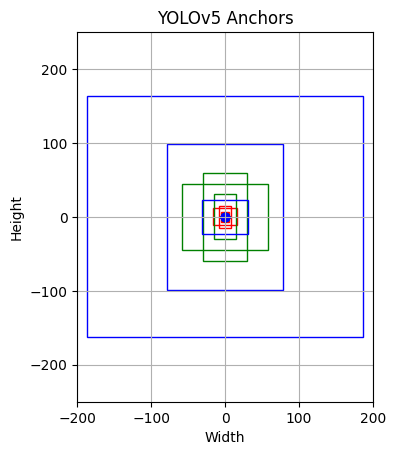

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

anchors = [[16, 30], [10, 13], [33, 23], [30,61], [59, 119], [116, 90], [373, 326], [62, 45], [156, 198]]  # Given anchors

print(anchors)

# [TODO] Draw anchors
# Draw anchors
def draw_anchors(anchors):
    fig, ax = plt.subplots(1)
    colors = ['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b']
    for i, anchor in enumerate(anchors):
        width, height = anchor
        rect = patches.Rectangle((-width / 2, -height / 2), width, height, linewidth=1, edgecolor=colors[i], facecolor='none')
        ax.add_patch(rect)
        plt.scatter(0, 0, c=colors[i], label=f'Anchor {i+1} ({width}, {height})')
    
    ax.set_xlim(-200, 200)
    ax.set_ylim(-250, 250)
    ax.set_aspect('equal')
    plt.legend()
    plt.title('YOLOv5 Anchors')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.grid(True)
    plt.show()

# Call the function to draw anchors
draw_anchors(anchors)

In [39]:
from utils.dataloaders import create_dataloader
from utils.general import check_img_size, colorstr

imgsz = 416
batch_size = 1
single_cls = False
seed = 0

train_path = data_dict["train"]
gs = max(int(model.stride.max()), 32)  # grid size (max stride)
imgsz = check_img_size(imgsz, gs, floor=gs * 2)  # verify imgsz is gs-multiple

train_loader, dataset = create_dataloader(
    train_path,
    imgsz,
    batch_size,
    gs,
    single_cls,
    hyp=hyp,
    augment=True,
    cache=None,
    rect=False,
    rank=-1,
    workers=8,
    image_weights=False,
    quad=False,
    prefix=colorstr("train: "),
    shuffle=True,
    seed=seed,
)

train: Scanning /home/ailab/AUE8088-PA2/datasets/nuscenes_det2d/train.cache... 28130 images, 1425 backgrounds, 0 corrupt: 100%|██████████| 28130/28130 [00:00<?, ?it/s]


In [44]:
for imgs, targets, paths, _ in train_loader:
    imgs = imgs.to(device, non_blocking=True).float() / 255  # uint8 to float32, 0-255 to 0.0-1.0
    break

print(targets)

tensor([[0.00000, 6.00000, 0.47396, 0.57338, 0.14570, 0.31278],
        [0.00000, 0.00000, 0.70768, 0.59212, 0.01130, 0.02308],
        [0.00000, 6.00000, 0.37821, 0.62222, 0.04639, 0.17395],
        [0.00000, 6.00000, 0.09454, 0.58777, 0.04103, 0.03078],
        [0.00000, 6.00000, 0.12844, 0.59011, 0.05293, 0.03178],
        [0.00000, 6.00000, 0.16947, 0.59446, 0.08207, 0.04717],
        [0.00000, 6.00000, 0.34550, 0.59446, 0.11180, 0.04382],
        [0.00000, 2.00000, 0.62026, 0.92463, 0.02795, 0.01472],
        [0.00000, 0.00000, 0.69281, 0.92630, 0.01427, 0.03144],
        [0.00000, 0.00000, 0.98124, 0.92978, 0.02974, 0.14043],
        [0.00000, 3.00000, 0.68389, 0.93567, 0.02200, 0.02308],
        [0.00000, 2.00000, 0.53878, 0.92530, 0.02379, 0.01673],
        [0.00000, 2.00000, 0.19980, 0.92730, 0.08207, 0.04650]])


In [22]:
import torch
from models.common import DetectMultiBackend
from utils.torch_utils import select_device

weights = 'yolov5n.pt'
# data = 'data/nuscenes.yaml'
data = 'data/coco128.yaml'
half = False  # use FP16 half-precision inference
dnn = False  # use OpenCV DNN for ONNX inference
device = select_device('cpu')

model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)

# inference
model.eval()
with torch.no_grad():
    pred = model(imgs)  # forward

YOLOv5 🚀 ddf4e91 Python-3.8.10 torch-2.2.2+cu121 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs


In [28]:
from utils.general import non_max_suppression

import cv2
import random

conf_thres = 0.25  # confidence threshold
iou_thres = 0.45  # NMS IOU threshold
max_det = 1000  # maximum detections per image
classes = None
agnostic_nms = False  # class-agnostic NMS

pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)

# [TODO] draw predictions (see detect.py:L178)

def plot_one_box(x, img, color=None, label=None, line_thickness=3):
    # Draw bounding boxes
    tl = line_thickness or round(0.002 * max(img.shape[0:2]))  # line thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

# Convert tensor image to numpy
img = imgs[0].mul(255).permute(1, 2, 0).byte().numpy()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Plot predictions
for i, det in enumerate(pred):  # detections per image
    if len(det):
        for *xyxy, conf, cls in reversed(det):
            label = f'{dataset.names[int(cls)]} {conf:.2f}'
            plot_one_box(xyxy, img, label=label, color=(255, 0, 0), line_thickness=2)

# Display image with predictions
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


IndentationError: expected an indented block (165316996.py, line 41)